In [1]:
from fastlane_bot import Bot, Config, ConfigDB, ConfigNetwork, ConfigProvider
from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CPCContainer, T, Pair
from fastlane_bot.tools.analyzer import CPCAnalyzer
from fastlane_bot.tools.optimizer import CPCArbOptimizer
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCAnalyzer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCArbOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Bot))
from fastlane_bot.testing import *
import itertools as it
import collections as cl
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
from fastlane_bot import __VERSION__
require("3.0", __VERSION__)

Using default database url, if you want to use a different database, set the backend_url found at the bottom of manager_base.py
ConstantProductCurve v2.10.2 (07/May/2023)
CPCAnalyzer v0.1 (06/May/2023)
CPCArbOptimizer v3.6 (06/May/2023)
CarbonBot v3-b2.1 (03/May/2023)
imported m, np, pd, plt, os, sys, decimal; defined iseq, raises, require
Version = 3-b2.1 [requirements >= 3.0 is met]


# Prices on Mainnet and Tenderly [A012]

## Price estimates

In [2]:
start_time = time.time()
botm    = Bot()
print(f"elapsed time: {time.time()-start_time:.2f}s")

elapsed time: 3.35s


In [3]:
start_time = time.time()
CCm     = botm.get_curves()
print(f"elapsed time: {time.time()-start_time:.2f}s")

elapsed time: 0.28s


In [4]:
# bott    = Bot() # --> change to Tenderly bot
# CCt     = bott.get_curves()

In [5]:
start_time = time.time()
tokensm = CCm.tokens()
prices_usdc = CCm.price_estimates(tknbs=tokensm, tknqs=f"{T.USDC}", 
                                  stopatfirst=True, verbose=False, raiseonerror=False)
print(f"elapsed time: {time.time()-start_time:.2f}s")

elapsed time: 2.96s


In [6]:
pricesdf = pd.DataFrame(prices_usdc, index=tokensm, columns=["USDC"]).sort_values("USDC", ascending=False)
pricesdf

,USDC
renBTC-B27D,31026.68694
WBTC-C599,28931.165371
HBTC-d380,28907.996526
YFI-d93e,6150.714405
DIGG-01C3,3192.831206
...,...
SMT-7173,None
FIEF-a02D,None
LBR-aCcA,None
CPI-ec53,None


In [7]:
print("TOKEN                       PRICE(USD)")
print("======================================")
for ix, d in pricesdf.iterrows():
    try:
        p = float(d)
        price = f"{p:12,.4f}"
        if p < 1:
            continue
    except:
        continue
    print(f"{ix:25} {price}")

TOKEN                       PRICE(USD)
renBTC-B27D                31,026.6869
WBTC-C599                  28,931.1654
HBTC-d380                  28,907.9965
YFI-d93e                    6,150.7144
DIGG-01C3                   3,192.8312
XMON-Bf74                   3,043.1214
gOHM-a52f                   2,794.5015
wstETH-2Ca0                 2,148.2206
bDIGG-8e1a                  2,094.3795
cbETH-9704                  1,967.5682
rETH-6393                   1,963.7218
stETH-fE84                  1,915.8578
WETH-6Cc2                   1,915.3559
MKR-79A2                      686.4157
DXD-5521                      681.5105
GLM-6429                      436.3192
BZRX-f4b3                     431.0676
MONA-412A                     375.1570
GNO-6b96                      116.2261
QNT-4675                      114.5118
oSQTH-E86B                    113.9149
ETHV-aC76                     100.9282
AAVE-DaE9                      72.0748
ENS-9D72                       62.0844
ROOK-3d4a                

In [8]:
print("TOKEN                       PRICE(USc)")
print("======================================")
for ix, d in pricesdf.iterrows():
    try:
        p = float(d)
        price = f"{p*100:12,.6f}"
        if p >= 1.1:
            continue
    except:
        continue
    print(f"{ix:25} {price}")

TOKEN                       PRICE(USc)
agEUR-Bce8                  109.762142
EURT-E491                   109.310918
EUROe-2974                  109.140310
ICE-7DF9                    108.534646
BONE-18d9                   107.919391
RAIL-A33D                   106.004343
SD-D10f                     105.784058
AMPL-A161                   102.596397
XCAD-6Aa0                   102.585043
SUSHI-0fE2                  101.549055
LUSD-8bA0                   101.351308
DAI-1d0F                    100.308809
USDT-1ec7                   100.106963
GUSD-d5Cd                   100.080599
FEI-87CA                    100.016050
sUSD-5f51                   100.013340
USDC-eB48                   100.000000
BUSD-7C53                    99.994604
USDC-1130                    99.938938
DSU-7109                     99.863046
MIM-17F3                     99.762158
DOLA-9ce4                    99.727473
oneICHI-1e07                 99.725560
FRAX-b99e                    99.534666
one1INCH-3857            

In [9]:
print("TOKEN                      UNAVAILABLE")
print("======================================")
for ix, d in pricesdf.iterrows():
    try:
        p = float(d)
        continue
    except:
        pass
    print(f"{ix:25}")

TOKEN                      UNAVAILABLE
UFO-DC3B                 
XCHF-fc08                
PEPE-1933                
USDP-89E1                
ZENIQ-7233               
ARB-4ad1                 
SOTU-9162                
STRONG-017c              
SMT-7173                 
FIEF-a02D                
LBR-aCcA                 
CPI-ec53                 
0x0-1AD5                 


pair = CPI/USDT


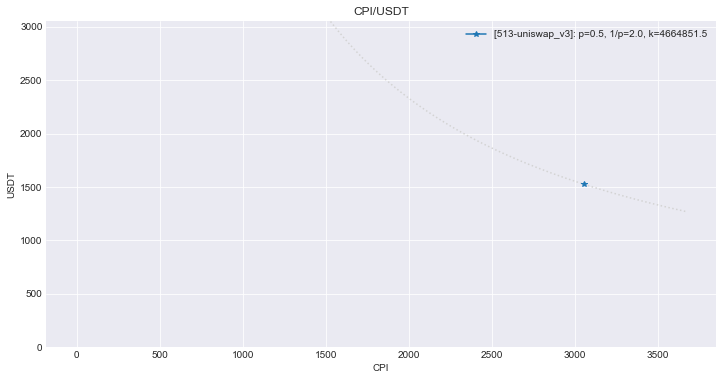

In [10]:
CCP = CCm.bypairs(CCm.filter_pairs(onein="CPI-ec53"))
CCP.plot()